기한: 12월 1일 (금) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch7. 1~2 pg. 409~427 

필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# Chapter 07. 군집화

## 7-01. K-평균 알고리즘의 이해

K-평균은 군집화 (clustering)에서 가장 일반적으로 사용되는 알고리즘입니다. K-평균은 군집 중심(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법입니다.

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고, 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행합니다. 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법입니다. 다음 그림에서 K-평균이 어떻게 동작하는지를 시각적으로 표현하였습니다.

1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓습니다. 전체 데이터를 2개로 군집화하려면 2개의 중심을 임의의 위치에 가져다 놓는 것입니다. (임의의 위치에 군집 중심점을 가져다 놓으면 반복적인 이동 수행을 너무 많이 해서 수행시간이 오래 걸리기 때문에 초기화 알고리즘으로 적합한 위치에 중심점을 가져다 놓지만, 여기서는 설명을 위해 임의의 위치로 가정하겠습니다.)

2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속됩니다. 위 그림에서는 A, B 데이터가 같은 중심점에 소속되며, C, E, F 데이터가 같은 중심점에 소속됩니다.

3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동합니다. 위 그림에서는 A, B 데이터 포인트의 평균 위치로 중심점이 이동했고, 다른 중심점 역시 C, E, F 데이터 포인트의 평균 위치로 이동했습니다.

4. 중심점이 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경합니다. 위 그림에서는 C 데이터가 기존의 중심점보다 더 가까운 중심점으로 변경되었습니다. 

5. 다시 중심을 소속된 데이터의 평균 중심으로 이동합니다. 위 그림에서는 데이터 C가 중심 소속이 변경되면서 두 개의 중심이 모두 이동합니다.

6. 중심점을 이동했는데 데이터의 중심점 소속 변경이 없으면 군집화를 종료합니다. 그렇지 않다면 다시 4번 과정을 거쳐서 소속을 변경하고 이 과정을 반복합니다.

#### K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘입니다.
- 알고리즘이 쉽고 간결합니다.

#### K-평균의 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어집니다. (이를 위해 PCA로 차원 감소를 적용해야 할 수도 있습니다.)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려집니다.
- 몇 개의 군집(cluster)을 선택해야할지 가이드하기가 어렵습니다.

### 사이킷런 KMeans 클래스 소개

KMeans 클래스는 다음과 같은 초기화 파라미터를 갖고 있다.

In [ ]:
class sklearn.cluster.KMeans(n_clusters = 8, init = 'K-means++', n_init = 10, max_iter = 300, \
        tol = 0.0001, precompute_distances = 'auto', verbose = 0, random_state = None, \
        copy_x = True, n_jobs = 1, algorithm = 'auto')

이 중 중요한 파라미터는 다음과 같다.
- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미한다.
- init은 초기에 군집 중심점의 좌표를 설정할 방식을 말하며, 보통은 임의로 중심을 설정하지 않고 일반적으로 K-means++ 방식으로 최초 설정한다.
- max_iter은 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.

KMeans는 사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터세트) 또는 fit_transform(데이터 세트) 메서드를 이용해 수행하면 된다. 이렇게 수행된 KMeans객체는 군집화 수행이 완료되어 군집화와 관련된 주요 속성을 알 수 있다. 다음은 이 주요 속성 정보이다.
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표(shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있다.

### K-평균을 이용한 붓꽃 데이터 세트 군집화

붓꽃 데이터를 이용해 K-평균 군집화를 수행해보자.

붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이(length)와 너비(width)에 따른 품종을 분류하는 데이터 세트이다. 꽃받침, 꽃잎의 길이에 따라 각 데이터의 군집화가 어떻게 결정되는지 확인해보고, 이를 분류 값과 비교해보자.

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [9]:
iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


붓꽃 데이터 세트를 3개의 그룹으로 군집화하자.

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

fit()을 수행하여 irisDF 데이터에 대한 군집화 수행 결과가 'kmeans' 객체 변수로 변환되었다.
kmeans의 labels_ 속성값을 확인해보면 irisDF의 각 데이터가 어떤 중심에 속하는 지 알 수 있다.

In [11]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


실제 붓꽃 품종 분류값과 얼마나 차이가 나는지로 군집화의 효과를 확인해보자. 붓꽃 데이터 세트의 target값을 'target' 칼럼으로, 앞에서 구한 labels_값을 'cluster' 칼럼으로 지정하여 irisDF에 추가한 뒤에 group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교할 수 있다.

In [12]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- (target = 0) 데이터 50개는 (cluster = 1)로 모두 잘 grouping 되었다.
- (target = 1) 데이터 50개 중 48개가 (cluster = 0)으로, 2개가 (cluster = 2)로 grouping 되었다.
- (target = 2) 데이터 50개 중 14개가 (cluster = 0)으로, 36개가 (cluster = 2)로 grouping 되었다.

#### 시각화
이번에는 붓꽃 데이터 세트의 군집화를 시각화해보자.

2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하려고 한다.

붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현하도록 하자.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


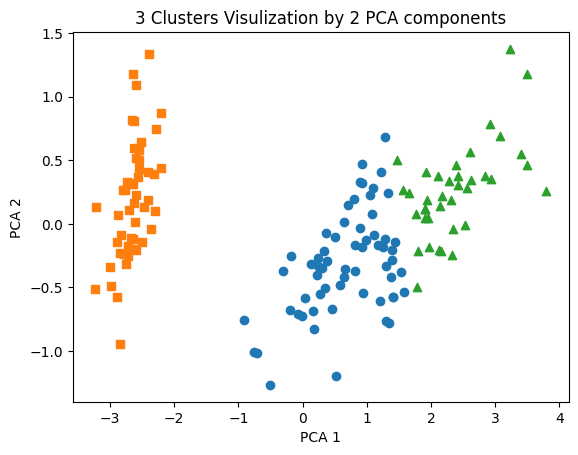

In [14]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출, o, s, ^로 마커 표시
plt.scatter(x = irisDF.loc[marker0_ind, 'pca_x'], y = irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x = irisDF.loc[marker1_ind, 'pca_x'], y = irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x = irisDF.loc[marker2_ind, 'pca_x'], y = irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visulization by 2 PCA components')
plt.show()

cluster1을 나타내는 네모는 명확히 다른 군집와 잘 분리되어있다. cluster0을 나타내는 동그라미와 cluster2를 나타내는 세모는 상당 수준 분리되어 있지만, 네모만큼 명확하게 분리되어 있지는 않은 것을 확인할 수 있다. cluster 0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다.

### 군집화 알고리즘 테스트를 위한 데이터 생성

사이킷런은 다양한 유형의 군집화 알고리즘을 테스트해보기 위한 간단한 '데이터 생성기'를 제공한다. 대표적인 군집화용 데이터 생성기로는 make_blobs()와 make_classification() API가 있다.
두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.

둘 중에 어떤 것을 사용하든 큰 차이는 없지만
- make_blobs()는 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있으며
- make_classification()은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용될 수 있다.
둘 다 분류 용도로도 테스트 데이터 생성이 가능하다.

이 외에 make_circle(), make_moon() API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는 데 사용된다.

make_blobs()의 간략한 사용법을 알아보면서 군집화를 위한 테스트 데이터 세트를 만드는 방법을 알아보자.

#### make_blobs()
make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환된다. make_blobs()의 호출 파라미터는 다음과 같다.

- n_samples : 생성할 총 데이터의 개수. 디폴트 100
- n_features : 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정하여 첫 번째 피처는 x좌표, 두 번째 피처는 y좌표상에 표현한다.
- centers : int값. 예를 들어 3으로 설정하면 군집의 개수를 나타낸다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
- cluster_std : 생성될 군집 데이터의 표준편차를 의미한다. 만일 float값 0.8로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어진다. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집부터 차례로 0.8, 1.2, 0.6의 표준편차값을 갖는 데이터 세트가 만들어진다.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [16]:
X, y = make_blobs(n_samples=200, n_features=2, centers = 3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [17]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns= ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


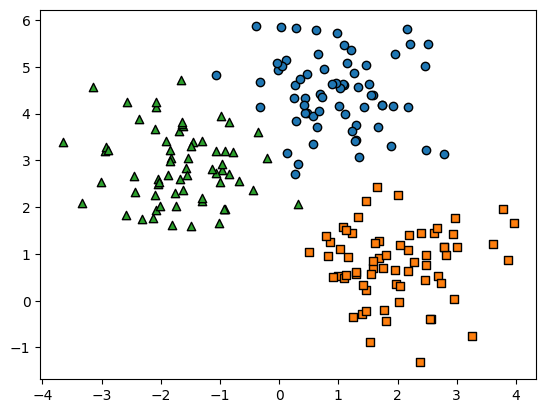

In [18]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target = 0, target = 1, target = 2로 scatter plot을 marker별로 생성
for target in target_list :
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], \
                edgecolor='k', marker=markers[target])
    

plt.show()



#### 군집별 시각화
이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화 해보자.

C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


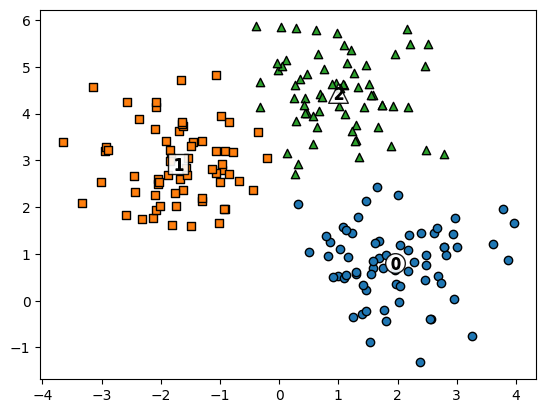

In [21]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels :
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolors='k', marker = markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white', \
                alpha = 0.9, edgecolors='k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', \
            edgecolors='k', marker = '$%d$' % label)
    
plt.show()

In [22]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: kmeans_label, dtype: int64


## 7-02. 군집 평가 (Cluster Evaluation)

앞의 붓꽃 데이터 세트는 타깃 레이블이 있었기에 군집화가 얼마나 효율적으로 됐는지 확인할 수 있었다.
하지만 대부분의 군집화 데이터 세트는 비교할만한 타깃 레이블을 갖고 있지 않다.

또한 군집화는 분류와 유사해보일 수 있으나 아래와 같은 점에서 그 성격이 다르다. 
1) 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여할 수 있다.
2) 동일한 분류값에 속하더라도 그 안에서 더 세분화된 군집화를 추구한다.
3) 서로 다른 분류값의 데이터도 더 넓은 군집화를 이루기도 한다.

따라서 분류결과와 군집화를 비교하여 평가하기에는 무리가 있다.
그렇다면 군집화가 효율적으로 이루어졌는지 평가할 수 있는 지표는 어떤 것이 있을까?

비지도학습의 특성상 어떠한 지표라도 정확하게 성능을 평가하기는 어렵다.
그럼에도 군집화의 성능을 평가하는 대표적인 방법으로 실루엣 분석을 이용한다.

### 실루엣 분석의 개요
군집화 평가 방법의 하나로 실루엣 분석(silhouette analysis)이 있다. 실루엣 분석은 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지를 나타낸다. '효율적으로 잘 분리되었다'라는 것은 다른 군집과의 거리는 멀고 동일 군집 내의 데이터끼리는 가깝다는 것을 의미한다.

실루엣 분석은 실루엣 계수 (silhouette coefficient)를 기반으로 한다. 실루엣 계수는 개별 데이터 각각이 가지는 군집화 지표이다. 개별 데이터가 가지는 실루엣 계수는 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어있으며 다른 군집의 데이터와는 얼마나 멀리 분리되어있는지를 나타내는 지표이다.

특정 데이터 포인트의 실루엣 계수 값은 a(i), b(i)를 기반으로 계산한다.

- a(i) : i번째 데이터와 같은 군집 내의 다른 데이터 포인트와의 거리를 평균한 값
- b(i) : i번째 데이터가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리

두 군집 간의 거리가 얼마나 멀리 떨어져 있는가는 b(i) - a(i) 값이며, 이 값을 정규화하기 위해 MAX(a(i), b(i)) 값으로 나눈다. 따라서 i번째 데이터 포인트의 실루엣 계수값 s(i)는 다음과 같이 정의한다.

s(i) = (b(i)-a(i))/MAX(a(i), b(i))

실루엣 계수는 -1에서 1사이의 값을 가진다.
- 1로 가까울수록 다른 군집과 더 멀다는 것을 의미한다.
- 0에 가까울수록 다른 군집과 더 가깝다는 것을 의미한다.
- (-)값은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미한다.

#### 사이킷런이 제공하는 실루엣 분석 메서드
- sklearn.metrics.silhouette_samples(X, labels, metric = 'euclidean', **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 각 데이터 포인트의 실루엣 계수를 계산해 반환한다.

- sklearn.metrics.silhouette_score(X, labels, metric = 'euclidean', sample_size = None, **kwds) : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해주면 전체 데이터의 실루엣 계수 값을 평균해 반환한다. 즉, np.mean(silouette_samples())이다. 일반적으로 이 값이 높을수록 군집화가 어느 정도 잘 이루어졌다고 판단할 수 있다. 하지만 무조건 이 값이 높다고 해서 군집화가 잘 이루어졌다고 판단할 수는 없다.

#### 좋은 군집화가 되려면 다음 기준 조건을 만족해야 한다.
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score()값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋다.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [23]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [34]:
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data = iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터의 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape : ', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score : {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape :  (150,)
붓꽃 데이터 세트 Silhouette Analysis Score : 0.553


C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


평균 실루엣 계수 값이 0.553이다.
1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타내고 있다.
1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문일 것이다.

irisDF에서 군집 칼럼별로 groupby하여 silhouette_coeff 칼럼의 평균값을 구하면 군집별 평균 실루엣 계수값을 구할 수 있다.

In [35]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 되었다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 K-평균의 적절할 군집 개수가 설정됐다고 판단할 수 있다.

In [ ]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box = (-10.0, 10.0), \
                  shuffle = True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
# visualize_silhouette([2,3,4,5],X)